In [1]:
import pandas as pd
import seaborn as sns

In [3]:
from metfrag_evaluation.isdb import download_isdb, load_isdb, filter_massspecgym_spectra
from metfrag_evaluation.massspecgym import (
    load_massspecgym,
    to_spectra,
)

massspecgym = load_massspecgym()
spectra = to_spectra(massspecgym)
download_isdb()
isdb = load_isdb()
spectra = filter_massspecgym_spectra(spectra, isdb, hydrogen_adduct_only=True)

In [6]:
len(spectra)

64087

In [7]:
df = pd.read_csv("lotus_metfrag_scores.csv")

In [8]:
cfmid = pd.read_csv("lotus_cfmid_scores.csv")

In [9]:
metfrag_inchikeys = set(df.inchikey)
cfmid_inchikeys = set(cfmid.inchikey_msg)

# we only want to keep the intersection of the two sets
intersection_inchikeys = metfrag_inchikeys.intersection(cfmid_inchikeys)

cfmid = cfmid[cfmid.inchikey_msg.isin(intersection_inchikeys)]
df = df[df.inchikey.isin(intersection_inchikeys)]

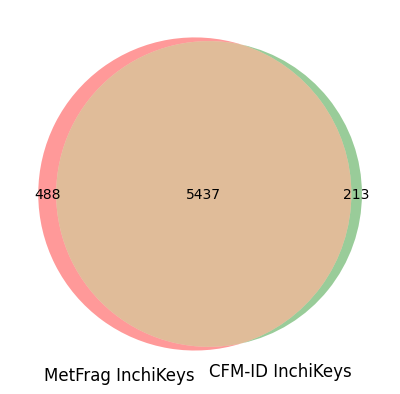

In [10]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

venn2(
    [metfrag_inchikeys, cfmid_inchikeys],
    ("MetFrag InchiKeys", "CFM-ID InchiKeys"),
)

Text(0.5, 1.0, 'Distribution of MetFrag Scores')

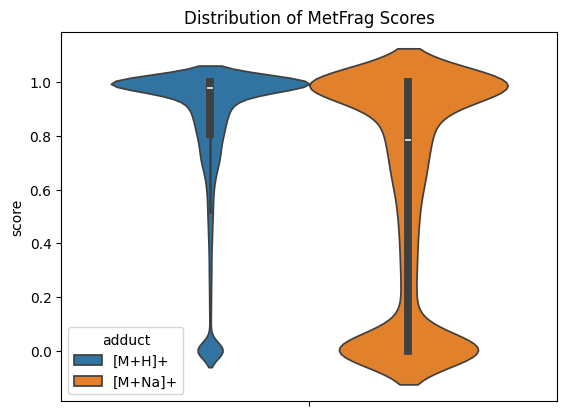

In [11]:
sns.violinplot(
    y=df["score"],
    data=df,
    hue="adduct",
).set_title("Distribution of MetFrag Scores")

[Text(0.5, 1.0, 'MetFrag Top N Distribution')]

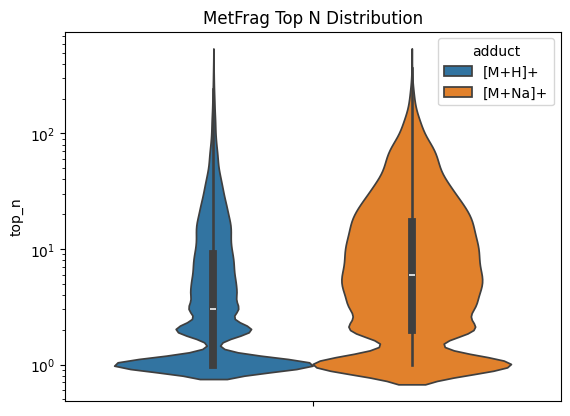

In [12]:
sns.violinplot(
    y="top_n",
    data=df,
    hue="adduct",
    log_scale=True,
    # log scale for y axis
).set(
    title="MetFrag Top N Distribution",
)

In [13]:
df.drop(columns="n_empty").describe()

,score,top_n
count,71402.000000,71402.000000
mean,0.789936,11.140976
std,0.326364,23.787785
min,0.000000,1.000000
25%,0.738670,1.000000
50%,0.962713,3.000000
75%,1.000000,11.000000
max,1.000000,408.000000


In [14]:
df[df["adduct"] == "[M+H]+"].describe()

,n_empty,score,top_n
count,57465.0,57465.000000,57465.000000
mean,10957.0,0.838033,10.096668
std,0.0,0.276899,23.224773
min,10957.0,0.000000,1.000000
25%,10957.0,0.807037,1.000000
50%,10957.0,0.976510,3.000000
75%,10957.0,1.000000,9.000000
max,10957.0,1.000000,408.000000


In [15]:
df[df["adduct"] == "[M+Na]+"].describe()

,n_empty,score,top_n
count,13937.0,13937.000000,13937.000000
mean,10957.0,0.591624,15.446868
std,0.0,0.425086,25.534323
min,10957.0,0.000000,1.000000
25%,10957.0,0.000000,2.000000
50%,10957.0,0.785826,6.000000
75%,10957.0,1.000000,17.000000
max,10957.0,1.000000,368.000000


## CFM-ID

In [16]:
cfmid["rank_per_spectra"] = (
    cfmid.groupby("feature_id")["cosine_similarity"]
    .rank(method="min", ascending=False)
    .astype(int)
)

cfmid["is_correct_hit"] = cfmid["inchikey_isdb"] == cfmid["inchikey_msg"]

In [17]:
cfmid_res = cfmid[cfmid.is_correct_hit == True]

In [18]:
cfmid_res.describe()

,cosine_similarity,matched_peaks,feature_id,reference_id,rank_per_spectra
count,57274.000000,57274.000000,57274.000000,57274.000000,57274.000000
mean,0.419277,10.335283,31136.281489,54928.035828,8.111307
std,0.300774,11.031849,18288.883391,42865.135447,21.352482
min,0.000000,0.000000,0.000000,101.000000,1.000000
25%,0.135042,3.000000,15369.250000,17008.000000,1.000000
50%,0.417494,7.000000,30532.500000,43739.000000,2.000000
75%,0.679817,14.000000,46635.750000,88958.000000,6.000000
max,0.998359,135.000000,64086.000000,148817.000000,393.000000


In [19]:
cfmid_res[cfmid_res.instrument == "Orbitrap"].describe()

,cosine_similarity,matched_peaks,feature_id,reference_id,rank_per_spectra
count,35902.000000,35902.000000,35902.000000,35902.000000,35902.000000
mean,0.384348,9.176508,31955.180463,54498.462732,8.000056
std,0.306703,10.433073,19463.176414,43866.606078,21.734955
min,0.000000,0.000000,0.000000,101.000000,1.000000
25%,0.072665,2.000000,15454.500000,15947.000000,1.000000
50%,0.360278,6.000000,31155.500000,43091.000000,2.000000
75%,0.655220,12.000000,51269.750000,89713.000000,6.000000
max,0.998103,135.000000,64072.000000,148817.000000,367.000000


In [20]:
cfmid_res[cfmid_res.instrument == "QTOF"].describe()

,cosine_similarity,matched_peaks,feature_id,reference_id,rank_per_spectra
count,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000
mean,0.484980,11.155612,28465.786351,54419.621256,7.968235
std,0.283222,10.645960,15936.515870,40997.476715,19.489193
min,0.000000,0.000000,10.000000,101.000000,1.000000
25%,0.242657,4.000000,12984.250000,18323.000000,1.000000
50%,0.500015,8.000000,29238.500000,43739.000000,2.000000
75%,0.724840,14.000000,39309.500000,85417.000000,7.000000
max,0.998359,107.000000,64086.000000,148625.000000,393.000000


<Axes: ylabel='rank_per_spectra'>

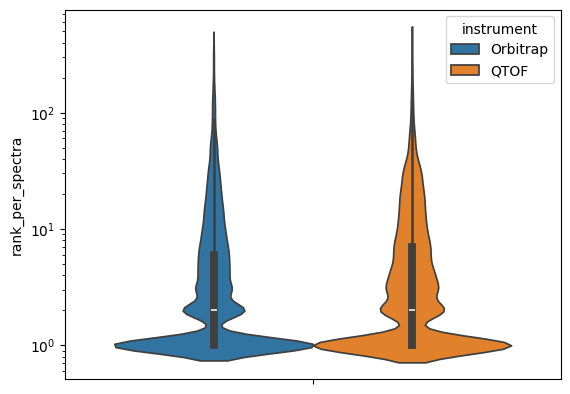

In [21]:
sns.violinplot(
    y="rank_per_spectra",
    data=cfmid_res,
    hue="instrument",
    log_scale=True,
)

<Axes: ylabel='cosine_similarity'>

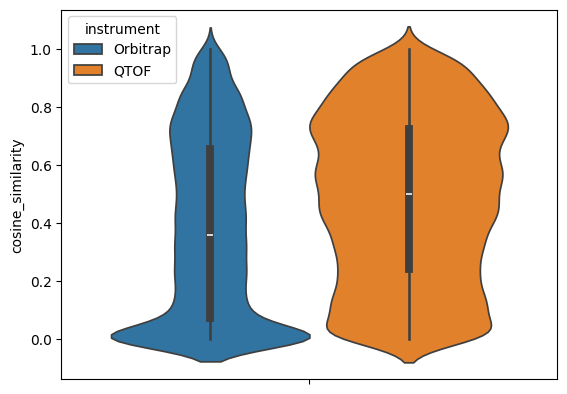

In [22]:
sns.violinplot(
    y="cosine_similarity",
    data=cfmid_res,
    hue="instrument",
)

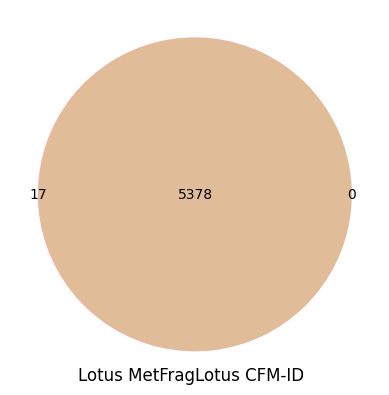

In [23]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

lotus_metfrag = set(df[df.adduct == "[M+H]+"].inchikey)  # metfrag results
lotus_cfm = set(cfmid_res.inchikey_msg)

venn2(
    [lotus_metfrag, lotus_cfm],
    ("Lotus MetFrag", "Lotus CFM-ID"),
)

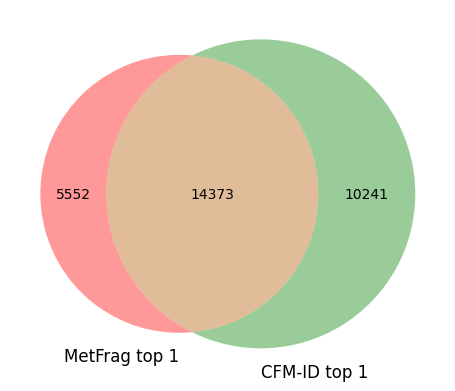

In [24]:
venn2(
    [
        set(df[(df.top_n == 1) & (df.adduct == "[M+H]+")].identifier),
        set(cfmid_res[cfmid_res.rank_per_spectra == 1].identifier),
    ],
    ("MetFrag top 1", "CFM-ID top 1"),
)

In [25]:
print(
    len(
        set(df[(df.top_n == 1) & (df.adduct == "[M+H]+")].identifier),
    )
)
print(
    len(
        set(cfmid_res[cfmid_res.rank_per_spectra == 1].identifier),
    )
)

19925
24614


In [26]:
from metfrag_evaluation.massspecgym import load_massspecgym

sirius_orbi = pd.read_csv(
    "data/sirius/sirius_orbitrap/structure_identifications_all.tsv", sep="\t"
)
sirius_orbi["instrument_type"] = "Orbitrap"
sirius_qtof = pd.read_csv(
    "data/sirius/sirius_qtof/structure_identifications_all.tsv", sep="\t"
)
sirius_qtof["instrument_type"] = "QTOF"
sirius = pd.concat([sirius_orbi, sirius_qtof], ignore_index=True)
msg = load_massspecgym()

In [27]:
dict_to_map = {}
for msg_id, msg_inchikey in zip(msg.index, msg.inchikey):
    dict_to_map[msg_id] = msg_inchikey

In [28]:
sirius["true_inchikey"] = sirius["mappingFeatureId"].map(dict_to_map)

In [29]:
sirius_res = sirius[sirius.InChIkey2D == sirius["true_inchikey"]]

In [30]:
sirius_res.describe()

/home/visanim/github/metfrag-evaluation/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/visanim/github/metfrag-evaluation/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,structurePerIdRank,formulaRank,ConfidenceScoreExact,ConfidenceScoreApproximate,CSI:FingerIDScore,ZodiacScore,SiriusScoreNormalized,SiriusScore,xlogp,dbflags,ionMass,retentionTimeInSeconds,retentionTimeInMinutes,formulaId,alignedFeatureId,overallFeatureQuality
count,45024.000000,45024.0,45024.000,45024.000,45024.000000,0.0,45024.0,45024.000000,45024.000000,4.502400e+04,45024.00000,0.0,0.0,4.502400e+04,4.502400e+04,0.0
mean,4.422241,1.0,-inf,-inf,-114.979717,NaN,1.0,61.804291,2.063513,1.243124e+11,380.69602,NaN,NaN,7.316055e+17,7.315902e+17,NaN
std,16.833575,0.0,NaN,NaN,146.407507,NaN,0.0,56.164633,2.557950,4.245068e+10,182.83518,NaN,NaN,1.700283e+14,1.738398e+14,NaN
min,1.000000,1.0,-inf,-inf,-1052.941000,NaN,1.0,-1.171000,-9.000000,2.684355e+08,74.06000,NaN,NaN,7.314986e+17,7.314969e+17,NaN
25%,1.000000,1.0,0.330,0.382,-149.611250,NaN,1.0,20.409250,0.644000,1.377989e+11,257.08100,NaN,NaN,7.315084e+17,7.314973e+17,NaN
50%,1.000000,1.0,0.702,0.765,-49.182000,NaN,1.0,43.815000,2.000000,1.383103e+11,339.04800,NaN,NaN,7.315190e+17,7.314976e+17,NaN
75%,2.000000,1.0,0.881,0.929,-21.097250,NaN,1.0,83.549750,3.200000,1.395773e+11,457.16200,NaN,NaN,7.315307e+17,7.314982e+17,NaN
max,372.000000,1.0,1.000,1.000,-0.900000,NaN,1.0,377.450000,21.900000,1.417333e+11,999.36800,NaN,NaN,7.319289e+17,7.319163e+17,NaN


<Axes: ylabel='structurePerIdRank'>

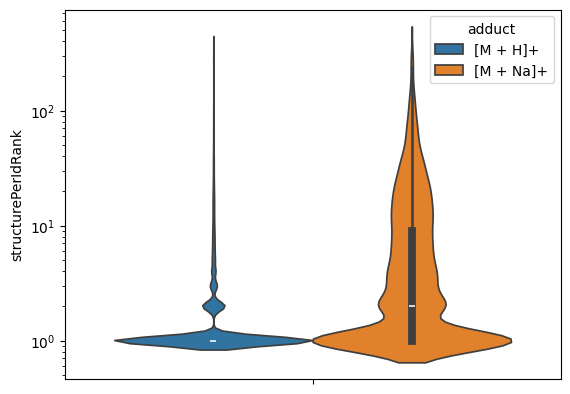

In [31]:
sns.violinplot(
    data=sirius_res,
    y="structurePerIdRank",
    log_scale=True,
    hue="adduct",
)

<Axes: ylabel='structurePerIdRank'>

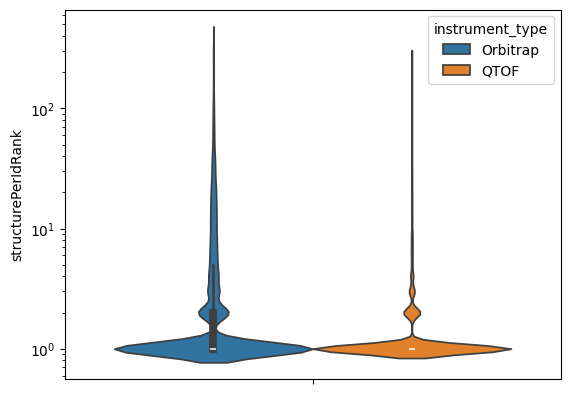

In [32]:
sns.violinplot(
    data=sirius_res,
    y="structurePerIdRank",
    log_scale=True,
    hue="instrument_type",
)

In [33]:
top_1_sirius = set(
    sirius_res[
        (sirius_res.structurePerIdRank == 1) & (sirius_res.adduct == "[M + H]+")
    ].mappingFeatureId
)

In [34]:
print(len(top_1_sirius))

28494


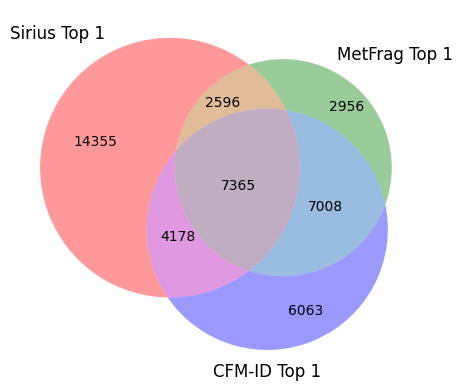

In [36]:
from matplotlib_venn import venn3

venn3(
    [
        top_1_sirius,
        set(df[(df.top_n == 1) & (df.adduct == "[M+H]+")].identifier),
        set(cfmid_res[cfmid_res.rank_per_spectra == 1].identifier),
    ],
    ("Sirius Top 1", "MetFrag Top 1", "CFM-ID Top 1"),
)

In [55]:
print("Ratio top 1 spectra for Sirius", len(top_1_sirius) / len(spectra))
print(
    "Ratio top 1 spectra for MetFrag",
    len(set(df[(df.top_n == 1) & (df.adduct == "[M+H]+")].identifier)) / len(spectra),
)
print(
    "Ratio top 1 spectra for CFM-ID",
    len(set(cfmid_res[cfmid_res.rank_per_spectra == 1].identifier)) / len(spectra),
)

Ratio top 1 spectra for Sirius 0.44461435236475416
Ratio top 1 spectra for MetFrag 0.3109054878524506
Ratio top 1 spectra for CFM-ID 0.3840716525972506


In [ ]:
print(
    len(
        (
            top_1_sirius.union(
                set(df[(df.top_n == 1) & (df.adduct == "[M+H]+")].inchikey)
            )
        ).union(set(cfmid_res[cfmid_res.rank_per_spectra == 1].inchikey_msg))
    )
    / len(spectra)
)

0.49566994866353553


In [58]:
len(spectra)

64087